<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/C7_L8_Principle_component_analysis_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction: Principle component analysis**


Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional space while preserving as much of the variance (information) as possible. The method achieves this by identifying directions (principal components) in which the data varies the most.



## **Load Data**

In [ ]:
##Load data
PDXdataset = read.delim('https://raw.githubusercontent.com/pine-bio-support/ML-Demo/master/Final_expression_genes_cell_lines_without-labels.txt', header = TRUE, row.names = 1, sep='\t')
expr_matrix <- PDXdataset
# Check the structure of the data
dim(expr_matrix)  # Dimensions of the dataset
head(expr_matrix)  # Preview the first few rows and columns

[1] 6916   54

,X184A1,X184B5,X21MT1,X21NT,X21PT,X600MPE,AU565,BT474,BT483,BT549,⋯,SUM229PE,SUM52PE,T47D,UACC812,UACC812.1,UACC893,UACC893.1,ZR751,ZR7530,ZR75B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,6.06,5.25,5.15,5.36,5.22,5.32,5.30,6.64,5.60,6.61,⋯,6.40,4.67,6.01,7.71,7.71,5.70,5.70,5.85,5.34,5.07
ENSG00000001036,4.47,5.39,5.28,5.82,5.75,6.11,4.80,4.47,4.99,6.94,⋯,5.14,6.22,5.07,5.76,5.76,5.40,5.40,4.27,5.03,5.68
ENSG00000001084,4.47,6.00,5.77,5.76,5.76,5.78,4.01,5.14,5.11,3.63,⋯,4.38,6.38,4.52,3.24,3.24,4.35,4.35,2.49,5.89,4.37
ENSG00000001497,5.27,4.27,6.58,5.54,5.57,4.93,6.16,5.36,5.10,6.16,⋯,6.16,5.11,4.79,5.83,5.83,4.89,4.89,5.33,4.23,6.03
ENSG00000001617,6.05,7.31,3.99,5.93,5.98,4.06,7.53,4.70,6.69,3.30,⋯,5.59,5.27,4.36,6.57,6.57,6.19,6.19,6.79,4.96,5.95
ENSG00000001630,6.24,5.26,5.67,6.11,5.77,6.74,5.15,6.14,5.27,3.88,⋯,5.49,8.10,4.76,4.58,4.58,4.19,4.19,5.35,5.45,5.23


## **Removal of low expression genes**
To reduce noise and improve computational efficiency

In [ ]:
expr_matrix <- expr_matrix[rowSums(expr_matrix > 1) >= 3, ]
dim(expr_matrix)  # Check the new dimensions

[1] 6710   54

## **log transformation**
The purpose of applying a log transformation to the expression matrix is to reduce the range of values and make the data more suitable for downstream analyses, such as dimensionality reduction (PCA).

In [ ]:
expr_matrix_log <- log2(expr_matrix + 1)

## **Perform Dimensionality Reduction Using PCA**

In [ ]:
pca_result <- prcomp(t(expr_matrix_log), scale. = TRUE)

In [ ]:
summary(pca_result)

Importance of components:
                           PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     34.1172 28.7208 19.33801 18.09939 16.60278 15.83685
Proportion of Variance  0.1735  0.1229  0.05573  0.04882  0.04108  0.03738
Cumulative Proportion   0.1735  0.2964  0.35214  0.40096  0.44204  0.47941
                            PC7      PC8     PC9     PC10     PC11     PC12
Standard deviation     15.11424 13.71161 13.4845 13.41152 12.71418 12.23722
Proportion of Variance  0.03404  0.02802  0.0271  0.02681  0.02409  0.02232
Cumulative Proportion   0.51346  0.54148  0.5686  0.59538  0.61947  0.64179
                           PC13    PC14     PC15     PC16   PC17     PC18
Standard deviation     11.86733 11.4693 10.98389 10.88698 10.680 10.12588
Proportion of Variance  0.02099  0.0196  0.01798  0.01766  0.017  0.01528
Cumulative Proportion   0.66278  0.6824  0.70036  0.71803  0.735  0.75031
                           PC19    PC20    PC21    PC22    PC23    PC24   

## **Assigning Lables**

In [ ]:
# Get PCA results (first two principal components)
pca_df <- as.data.frame(pca_result$x)
# Assign labels
sample_labels <- colnames(expr_matrix)

# Add this to your PCA data frame
pca_df$Condition <- sample_labels
head(pca_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,Condition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
X184A1,-9.020425,-35.62053,-11.87734,13.5366225,-11.68709,11.911873,-14.77372,0.4659255,-4.6696961,2.32623909,⋯,-1.7754538,0.3630458,-0.06761142,-6.004225e-14,-4.498463e-15,7.164408e-16,-4.440892e-16,2.081668e-16,9.853229e-16,X184A1
X184B5,-14.646280,-15.25058,-49.25089,7.0931427,-10.12857,24.949804,-18.54152,-8.4319527,-8.3822517,-0.05580619,⋯,-1.2982127,0.3451941,0.37265571,-4.719836e-14,2.471981e-15,1.779826e-15,-9.645063e-15,4.607426e-15,2.733924e-15,X184B5
X21MT1,37.900967,-30.82533,21.06100,1.3530508,33.71027,1.850227,-13.65665,6.3076677,-0.5611158,-7.02786554,⋯,-1.0477859,22.8625514,-1.24450966,-3.683859e-14,-3.859760e-16,-1.331400e-14,-8.201773e-15,5.325601e-16,-3.941292e-15,X21MT1
X21NT,26.251971,-26.49044,18.81375,0.8695025,32.61305,-5.213739,-19.91271,3.8444175,-5.8480808,-7.74236374,⋯,0.4460502,-13.0435340,-10.01439426,-3.255816e-14,-1.452397e-15,-1.242756e-14,-9.218321e-15,-8.777701e-16,6.640521e-15,X21NT
X21PT,29.635392,-28.80108,23.50089,1.7501059,34.86881,-4.813269,-18.29241,3.4293258,-4.3909974,-6.49058471,⋯,0.4221358,-9.5077602,11.01530283,-2.416123e-14,-2.164935e-15,-1.526904e-14,-8.881784e-15,1.484923e-15,1.187245e-14,X21PT
X600MPE,-74.376559,37.06864,-13.94223,8.4835745,20.91391,10.403368,-15.42259,3.8222074,-21.0096554,6.13520342,⋯,0.1762145,0.2425240,0.11856088,-6.820933e-14,-1.394718e-15,3.050685e-14,1.080386e-14,2.435552e-15,8.021361e-15,X600MPE


In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggplot2'”
Installing package(s) 'BiocVersion'



In [ ]:
library(ggplot2)

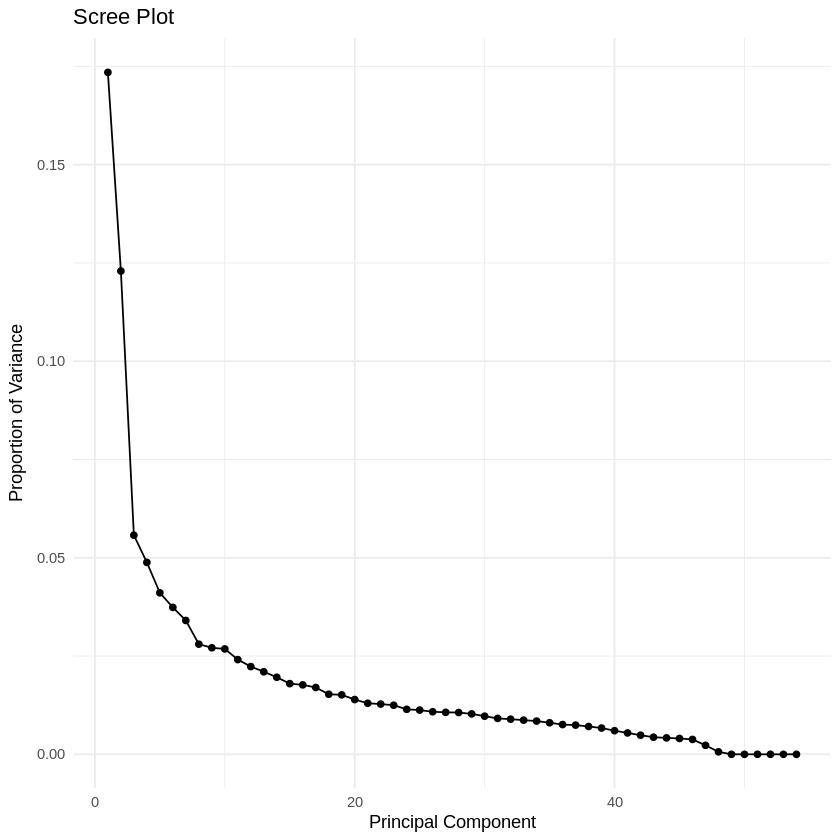

In [ ]:
scree_data <- data.frame(
  PC = 1:length(pca_result$sdev),
  Variance = (pca_result$sdev^2) / sum(pca_result$sdev^2)
)
ggplot(scree_data, aes(x = PC, y = Variance)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(title = "Scree Plot", x = "Principal Component", y = "Proportion of Variance")


###**Plot without Labels**

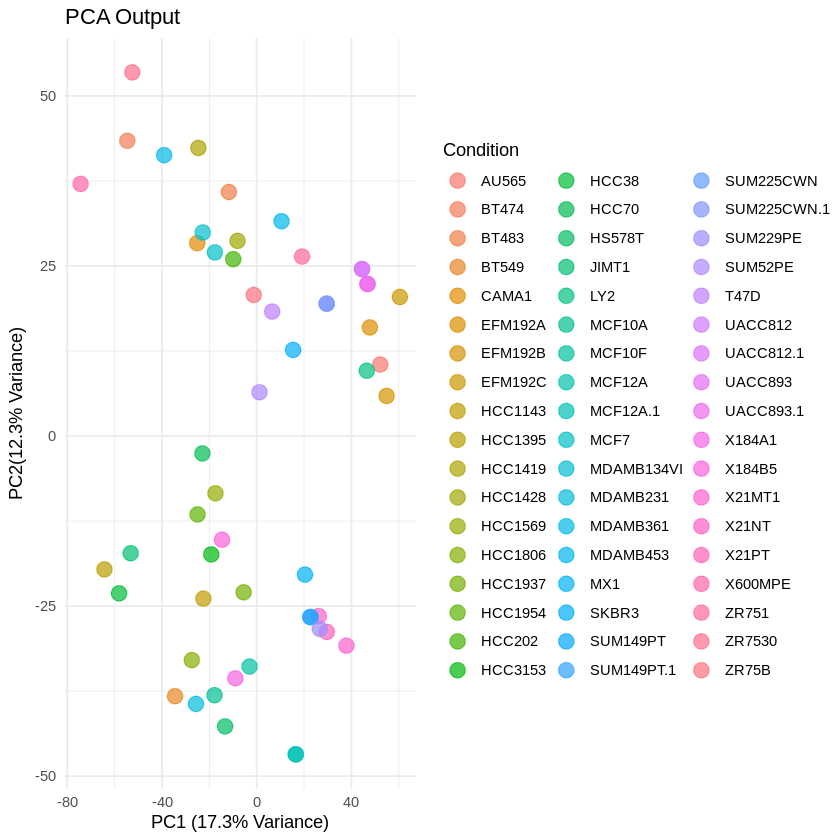

In [ ]:
ggplot(pca_df, aes(x = PC1, y = PC2, color = Condition)) +
  geom_point(size = 4, alpha = 0.7) +
  theme_minimal() +
   labs(title = "PCA Output",
       x = paste0("PC1 (", round(summary(pca_result)$importance[2, 1] * 100, 1), "% Variance)"),
       y = paste0("PC2(", round(summary(pca_result)$importance[2, 2] * 100, 1), "% Variance)"))

### **Plot with label information**

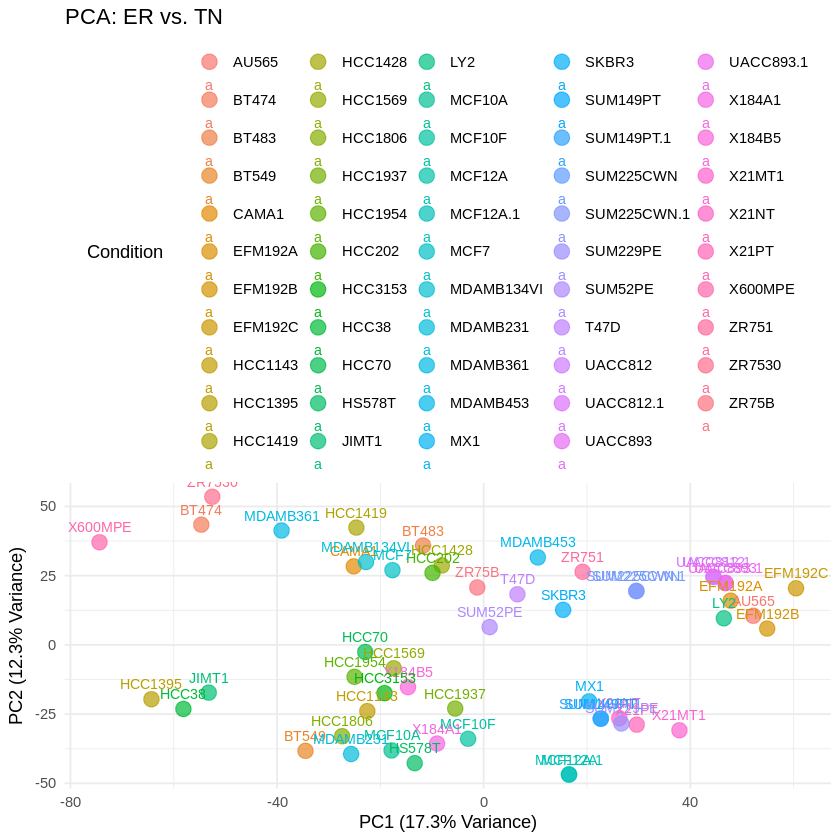

In [ ]:
library(ggplot2)

# Create PCA data frame
pca_df <- data.frame(PC1 = pca_result$x[,1],
                     PC2 = pca_result$x[,2],
                     Sample = colnames(expr_matrix),
                     Condition = factor(sample_labels))  # Replace 'sample_conditions' with your actual condition vector

# PCA plot with sample labels
ggplot(pca_df, aes(x = PC1, y = PC2, color = Condition)) +
  geom_point(size = 4, alpha = 0.7) +  # Scatter plot
  geom_text(aes(label = Sample), vjust = -1, size = 3) +  # Sample labels
  theme_minimal() +
  labs(title = "PCA: ER vs. TN",
       x = paste0("PC1 (", round(summary(pca_result)$importance[2, 1] * 100, 1), "% Variance)"),
       y = paste0("PC2 (", round(summary(pca_result)$importance[2, 2] * 100, 1), "% Variance)")) +
  theme(legend.position = "top")  # Move legend to top


# **T-SNE (t-distributed Stochastic Neighbor Embedding)**

In [ ]:
# Load required libraries
if (!requireNamespace("Rtsne", quietly = TRUE)) install.packages("Rtsne")
if (!requireNamespace("data.table", quietly = TRUE)) install.packages("data.table")

library(Rtsne)
library(data.table)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Load Data**

In [ ]:
# Load your uploaded file
expr_matrix_raw <- read.delim("https://raw.githubusercontent.com/pine-bio-support/ML-Demo/master/Final_expression_genes_cell_lines_without-labels.txt", stringsAsFactors = FALSE)

# Set row names as gene names and remove first column
rownames(expr_matrix_raw) <- expr_matrix_raw[, 1]
expr_matrix <- expr_matrix_raw[, -1]

# Convert to numeric matrix
expr_matrix <- as.matrix(expr_matrix)
expr_matrix <- apply(expr_matrix, 2, as.numeric)
rownames(expr_matrix) <- rownames(expr_matrix_raw)

# Remove low-expression genes
expr_matrix_filtered <- expr_matrix[rowSums(expr_matrix) > 1, ]

# Log2 transformation
expr_matrix_log <- log2(expr_matrix_filtered + 1)

# Transpose
expr_matrix_t <- t(expr_matrix_log)

# Remove duplicate samples
expr_matrix_t_unique <- expr_matrix_t[!duplicated(expr_matrix_t), ]



## **Run t-SNE**

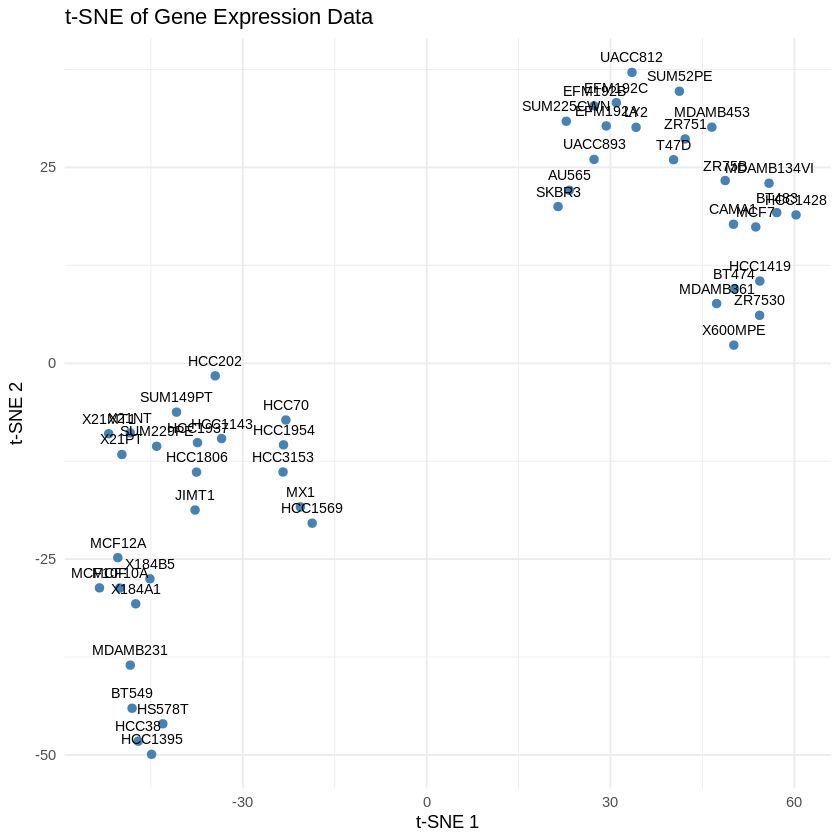

In [ ]:
# Run t-SNE
set.seed(42)
tsne_result <- Rtsne(expr_matrix_t_unique, dims = 2, perplexity = 5, verbose = FALSE)

# Plot
tsne_df <- as.data.frame(tsne_result$Y)
tsne_df$Sample <- rownames(expr_matrix_t_unique)

library(ggplot2)
ggplot(tsne_df, aes(x = V1, y = V2, label = Sample)) +
  geom_point(color = "steelblue", size = 2) +
  geom_text(vjust = -1, size = 3) +
  theme_minimal() +
  labs(
    title = "t-SNE of Gene Expression Data",
    x = "t-SNE 1",
    y = "t-SNE 2"
  )
